# Machine Learning - Predicting Steam Market Earnings after Commissions
By **Daniel Palacio** (github.com/palaciodaniel) - October 2020

In [1]:
# Loading required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1. Exploring the CSV

In [2]:
# Loading the information (from CSV file)

df = pd.read_csv("steam_commissions.csv", header = 0)
df.head()

,Earnings,Price
0,0.88,1.00
1,1.00,1.15
2,1.75,2.00
3,2.00,2.30
4,2.61,3.00


For clarification, 'Price' is the price we are aiming to sell our active on the Steam Market, while the 'Earnings' are the profit we would get after subtracting Valve's commissions.

I created the CSV basically by entering the Steam Market and manually inputting those values, by using an unsold card that I was keeping on my Inventory. Obviously I did not complete the transaction, otherwise I would have lost the card when entering the lowest prices.

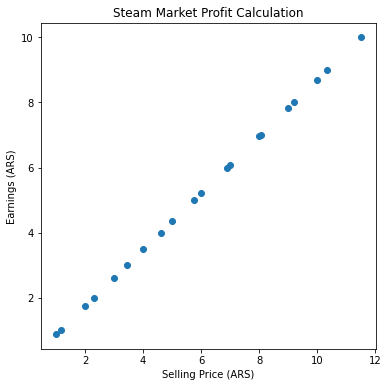

In [3]:
# Setting plot size

plt.rcParams["figure.figsize"] = (6, 6)

# Plotting itself

plt.scatter(x = df["Price"][:-12], y = df["Earnings"][:-12]) # Notice we are plotting only a segment.

# Title and axis settings

plt.title("Steam Market Profit Calculation")
plt.xlabel("Selling Price (ARS)") # ARS: Argentine Peso, remember.
plt.ylabel("Earnings (ARS)")

# Show finished plot

plt.show()

Thanks to the plot, we can see that Linear Regression is excellent to build a model for this situation.

### 2. Creating the Model

In [4]:
# Dividing into train and test subsets

X_train, X_test, y_train, y_test = train_test_split(df["Price"].to_numpy(), df["Earnings"].to_numpy(), \
                                                    test_size = 0.25, random_state = 24)

# Reshaping arrays (otherwise we will get the message: 'ValueError: Expected 2D array, got 1D array instead')

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Instantiating and fitting the model

lin_reg = LinearRegression().fit(X_train, y_train)

In [5]:
# Predicting values from X_test

y_pred = lin_reg.predict(X_test)

# Getting the score. The closer it is to 1.0 the better.

score = lin_reg.score(y_pred, y_test)
print("Score:", score)

Score: 0.9608926503415309


Due to how correlated all the values are, it was no surprise that we would get an extremely high score.

You can check the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) to confirm that this is a very robust model ("The best possible score is 1.0...").

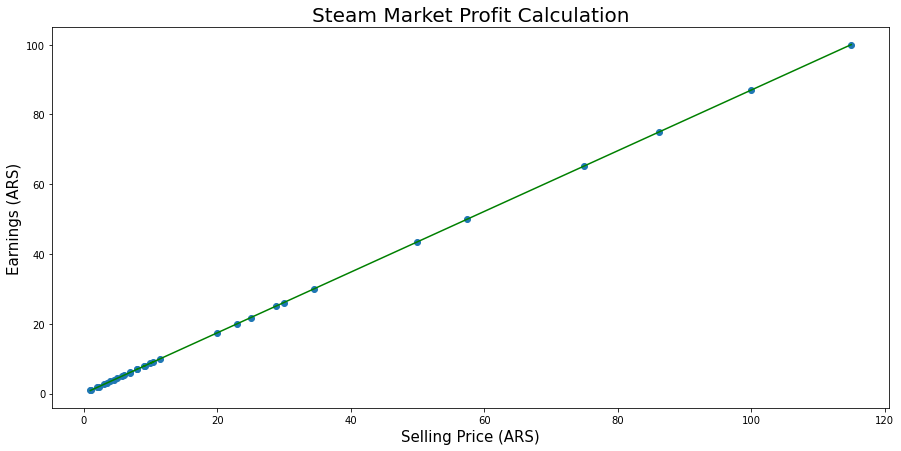

In [6]:
# Setting plot size

plt.rcParams["figure.figsize"] = (15, 7)

# As I said before, we reshape because scikit-learn by default expects a 2D array.

X_reshaped = df["Price"].values.reshape(-1, 1)

# Plotting itself

plt.scatter(x = df["Price"], y = df["Earnings"]) # Now we are plotting all values.
plt.plot(X_reshaped, lin_reg.predict(X_reshaped), color = "green") # This adds the prediction line.

# Title and axis settings

plt.title("Steam Market Profit Calculation", size = 20)
plt.xlabel("Selling Price (ARS)", size = 15)
plt.ylabel("Earnings (ARS)", size = 15)

# Show finished plot

plt.show()

As expected, our model (represented by the green line) effectively is "touching" all the values from the CSV. Therefore we can confidently use the model to predict all the values we want to know...

### 3. Applying the Model on our own Prices

In [9]:
# Here, as an example, I chose some random selling prices to be passed to the 'predict' method.

selected_values = np.array([1.72, 2.24, 3.84, 4.17, 6.65, 8.23, 10.15, 21.88, 56.57, 257.79])

for value in selected_values:
    reshaped_value = value.reshape(1, -1)
    pred_value = lin_reg.predict(reshaped_value)
    print("The predicted value for {} is {}.\n\n".format(value, round(pred_value[0][0], 2)))   

The predicted value for 1.72 is 1.5.


The predicted value for 2.24 is 1.95.


The predicted value for 3.84 is 3.34.


The predicted value for 4.17 is 3.63.


The predicted value for 6.65 is 5.79.


The predicted value for 8.23 is 7.16.


The predicted value for 10.15 is 8.83.


The predicted value for 21.88 is 19.03.


The predicted value for 56.57 is 49.19.


The predicted value for 257.79 is 224.17.




As a sanity check, I inputted the values from the array on the Steam Market, and I successfully got the same results there. I encourage you to do the same (but remember, **do not** confirm the transaction!).

In [ ]:
# And now it is your turn. Run this cell and input the value you prefer...

your_value = input("Enter your desired value: ")

try:
    value_float = float(your_value)
    value_array = np.array(value_float).reshape(1, -1)
except:
    raise ValueError("ERROR: Please write a number. Use a dot ('.') for decimals.")

predicted_value = lin_reg.predict(value_array)

print("\nRESULT: The predicted value for {} is {}. \
\n\nRun this Cell again if you want to try another value.".format(your_value, round(predicted_value[0][0], 2)))

Remember that if you do not have a Jupyter Notebook installed on your system, you can quickly load this same file on the [official site](https://jupyter.org/try) (just choose *Try Classic Notebook* and you are ready to go). 